In [7]:
from matplotlib.colors import hsv_to_rgb, rgb_to_hsv
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.transform import resize
from PIL import Image
import numpy as np


In [8]:
# Paths to be created
path_luminance_test = "luminance"
path_edge_test = "damiers"


# Create the luminance path if it doesn't exist
if not os.path.exists(path_luminance_test):
    os.makedirs(path_luminance_test)

# Create the edge test path if it doesn't exist
if not os.path.exists(path_edge_test):
    os.makedirs(path_edge_test)

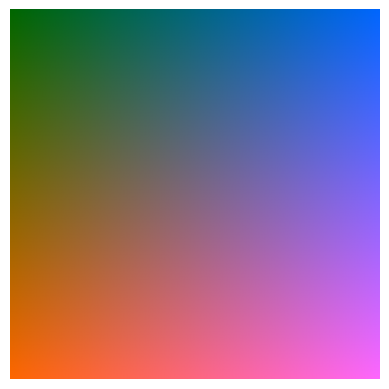

In [9]:

def generate_equal_mean(v):
    # Correction de l'erreur en limitant la plage de valeurs de r et g à 255
    image_const_gray = np.zeros((255, 255, 3), dtype=np.uint8)
    mask = np.zeros((255, 255), dtype=bool)

    sum_value = int(3*v*255)
    print(sum_value)


    for r in range(255):
        for g in range(255):
            b = sum_value - r - g
            if 0 <= b < 255:
                image_const_gray[r, g] = [r, g, b]
                mask[r, g] = True
            else:
                image_const_gray[r, g] = [int(v*255), int(v*255), int(v*255)]
                mask[r, g] = False

    return image_const_gray,mask

def generate_equal_mean_2(v):
    # Correction de l'erreur en limitant la plage de valeurs de r et g à 255
    image_const_gray = np.zeros((255, 255, 3), dtype=np.uint8)

    sum_value = int(3*v*255)


    for r in range(255):
        for g in range(255):
            b = sum_value - r - g
            if 0 <= b < 255 and (r+g)%30<15:
                image_const_gray[r, g] = [r, g, b]
            else:
                image_const_gray[r, g] = [int(v*255), int(v*255), int(v*255)]

    return image_const_gray

def generate_equal_mean_3(b):
    # Correction de l'erreur en limitant la plage de valeurs de r et g à 255
    image_const_gray = np.zeros((255, 255, 3), dtype=np.uint8)

    for r in range(255):
        for g in range(255):
            #image_const_gray[r, g] = [r, g, b]
            image_const_gray[r, g] = [r, b, g]
            

    return image_const_gray

def generate_equal_luminance(v):
    # Initialisation de l'image en HSV (teinte, saturation, valeur)
    image_hsv = np.zeros((255, 255, 3), dtype=float)
    
    # Remplissage de l'image en utilisant différentes teintes et saturations
    for i in range(255):
        for j in range(255):
            h = i / 255.0  # Teinte
            s = j / 255.0  # Saturation
            image_hsv[i, j] = [h, s, v]

    # Conversion de HSV en RGB
    image_rgb = hsv_to_rgb(image_hsv)

    return image_rgb


titre = "Vert_Constant_128"
image_rgb = generate_equal_mean_3(102)

image_rgb = resize(image_rgb, (1024, 1024))
try:
    mask = resize(mask, (1024, 1024))
except:
    pass

# Affichage de l'image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

if True:
    from PIL import Image

    # Conversion de l'image en format adapté pour la sauvegarde
    image_to_save = (image_rgb * 255).astype(np.uint8)
    img_tiff = Image.fromarray(image_to_save)

    # Sauvegarde de l'image au format TIFF
    img_tiff.save(path_luminance_test+"\\"+titre+'.tif')


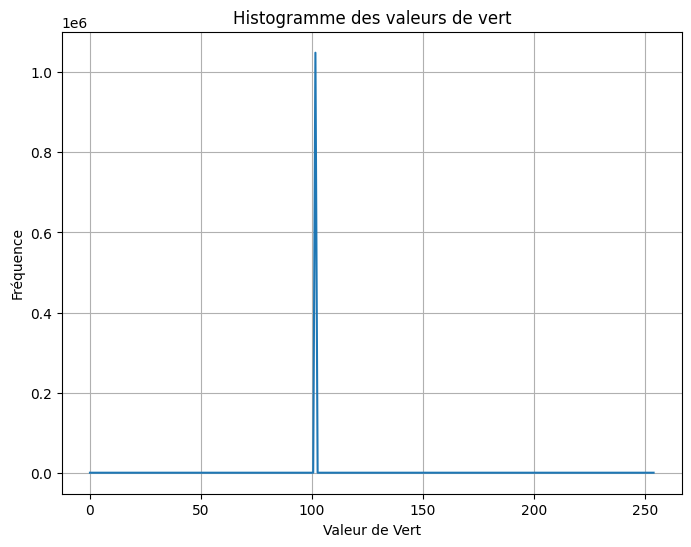

In [14]:
# Calcul de l'histogramme des valeurs de luminance
#histogram, bin_edges = np.histogram(np.mean(image_rgb,axis=2)*255, bins=256, range=(0, 255))
#histogram, bin_edges = np.histogram(image_rgb[:,:,2]*255, bins=256, range=(0, 255))
histogram, bin_edges = np.histogram(image_rgb[:,:,1]*255, bins=256, range=(0, 255))
# Tracé de l'histogramme
plt.figure(figsize=(8, 6))
plt.plot(bin_edges[0:-1], histogram)
plt.title('Histogramme des valeurs de vert')
plt.xlabel('Valeur de Vert')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

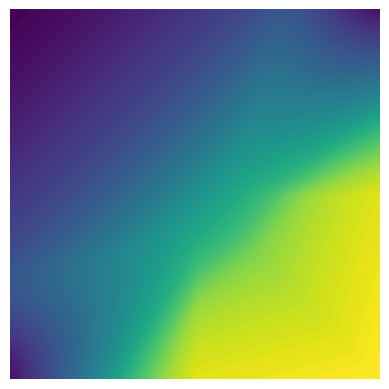

(182.48179721832275, array(776.78458915))

In [15]:
image_path = "luminance/"+titre+"_out"+".tif"

img_test = Image.open(image_path)
image_test_array = np.array(img_test)

# Affichage de l'image
channel = 1
plt.imshow(image_test_array[:,:,channel])
plt.axis('off')
plt.show()

data = image_test_array[:,:,channel]

# Calcul de la moyenne et de la covariance de la luminance
mean_data = np.mean(data)
covariance_data = np.cov(data.reshape(-1))

mean_data, covariance_data

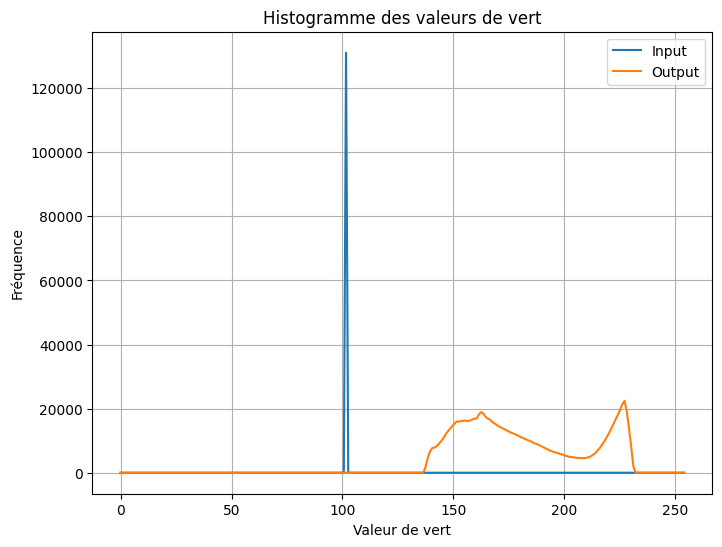

In [16]:
# Calcul de l'histogramme des valeurs de luminance
histogram_new, bin_edges_new = np.histogram(data, bins=256, range=(0, 255))

# Tracé de l'histogramme
plt.figure(figsize=(8, 6))
plt.plot(bin_edges[0:-1], histogram/8,label = "Input")
plt.plot(bin_edges_new[0:-1], histogram_new,label = "Output")
plt.title('Histogramme des valeurs de vert')
plt.xlabel('Valeur de vert')
plt.ylabel('Fréquence')
plt.legend()
plt.grid(True)
plt.show()